# Data Augmentation with Keras Preprocessing Layers

In this notebook, we will explore various Data Augmentation techniques using a single image (a cat). Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data.

We will cover:
1.  **Loading and Displaying an Image**
2.  **Individual Augmentation Layers**:
    *   RandomFlip
    *   RandomRotation
    *   RandomZoom
    *   RandomContrast
    *   RandomBrightness
    *   RandomTranslation
3.  **Building an Augmentation Pipeline**
4.  **Simulated Dataset**: Visualizing how one image can become many.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import os

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## 1. Load and Display the Cat Image

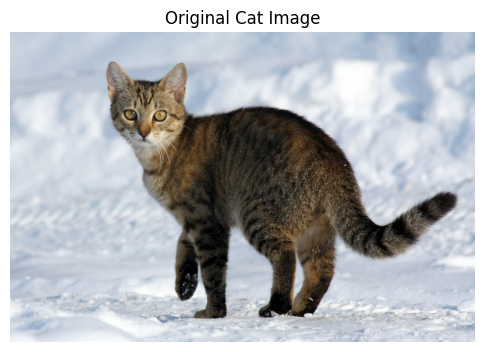

In [2]:
# Load the image
image_path = 'data/cat.jpg'
if not os.path.exists(image_path):
    # Fallback if running elsewhere or file missing, download a cat image
    image_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg"
    image_path = tf.keras.utils.get_file('cat.jpg', origin=image_url)

img = tf.keras.utils.load_img(image_path)
img_array = tf.keras.utils.img_to_array(img)
# img_array is float32, range [0, 255]

# Display original image
# Must cast to uint8 for matplotlib to display correctly if range is [0, 255]
plt.figure(figsize=(6, 6))
plt.imshow(img_array.astype("uint8"))
plt.title("Original Cat Image")
plt.axis("off")
plt.show()

## 2. Individual Augmentation Layers

Let's see what each layer does individually.

In [3]:
def visualize_augmentation(layer, image, title):
    plt.figure(figsize=(10, 5))
    
    # Original
    # Cast to uint8 for display
    plt.subplot(1, 2, 1)
    plt.imshow(image.astype("uint8"))
    plt.title("Original")
    plt.axis("off")
    
    # Augmented
    # Layers expect float32 input (typically), so we keep it as float
    expanded_img = tf.expand_dims(image, 0)
    augmented_img = layer(expanded_img)
    
    # Clip values to [0, 255] and cast to uint8 for display
    # Augmentations like contrast/brightness can push values out of bounds
    display_img = tf.clip_by_value(augmented_img[0], 0, 255).numpy().astype("uint8")
    
    plt.subplot(1, 2, 2)
    plt.imshow(display_img)
    plt.title(f"Augmented: {title}")
    plt.axis("off")
    plt.show()

### Random Flip
Flips the image horizontally or vertically.

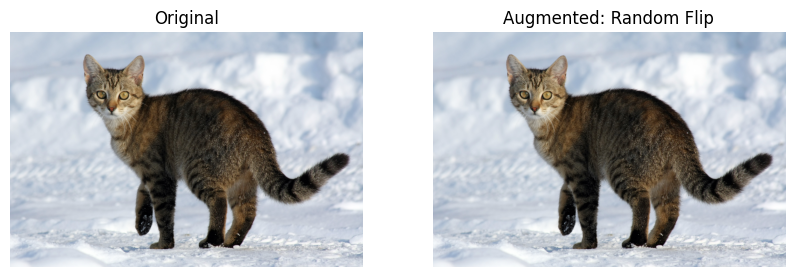

In [4]:
layer = layers.RandomFlip("horizontal_and_vertical")
visualize_augmentation(layer, img_array, "Random Flip")

### Random Rotation
Rotates the image by a random factor.

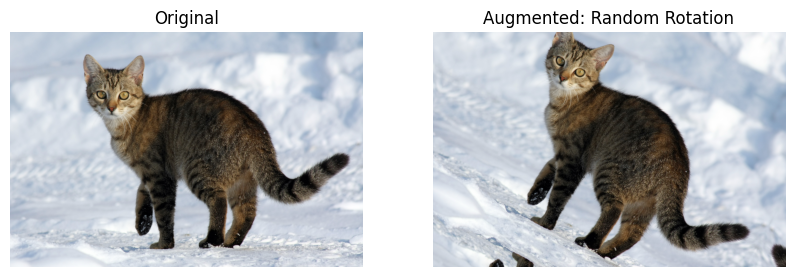

In [5]:
layer = layers.RandomRotation(factor=0.2) # Rotate by +/- 20% of 2pi
visualize_augmentation(layer, img_array, "Random Rotation")

### Random Zoom
Zooms in or out.

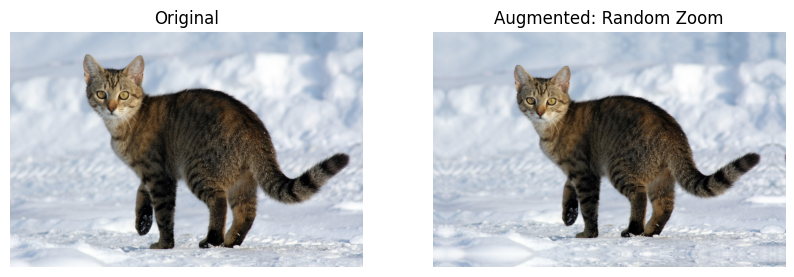

In [6]:
layer = layers.RandomZoom(height_factor=0.2, width_factor=0.2)
visualize_augmentation(layer, img_array, "Random Zoom")

### Random Contrast
Adjusts the contrast of the image.

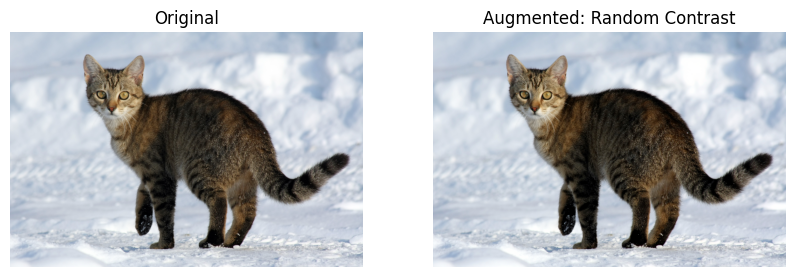

In [7]:
layer = layers.RandomContrast(factor=0.5)
visualize_augmentation(layer, img_array, "Random Contrast")

### Random Brightness
Adjusts the brightness of the image.

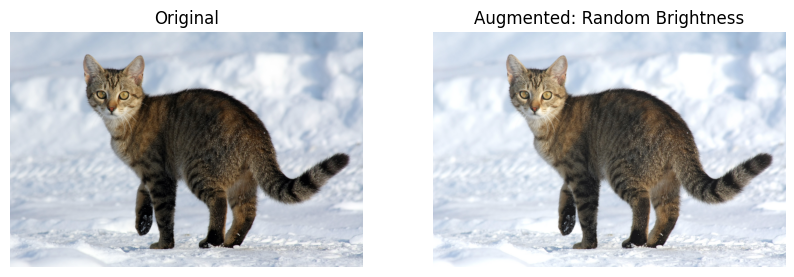

In [8]:
layer = layers.RandomBrightness(factor=0.4)
visualize_augmentation(layer, img_array, "Random Brightness")

## 3. Augmentation Pipeline
We can combine these layers into a single pipeline (model) that applies random transformations sequentially.

In [9]:
data_augmentation_pipeline = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomContrast(0.2),
  layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

## 4. Simulated Dataset: One Cat to Many
Visualize how a single image can provide diverse training examples for a model.

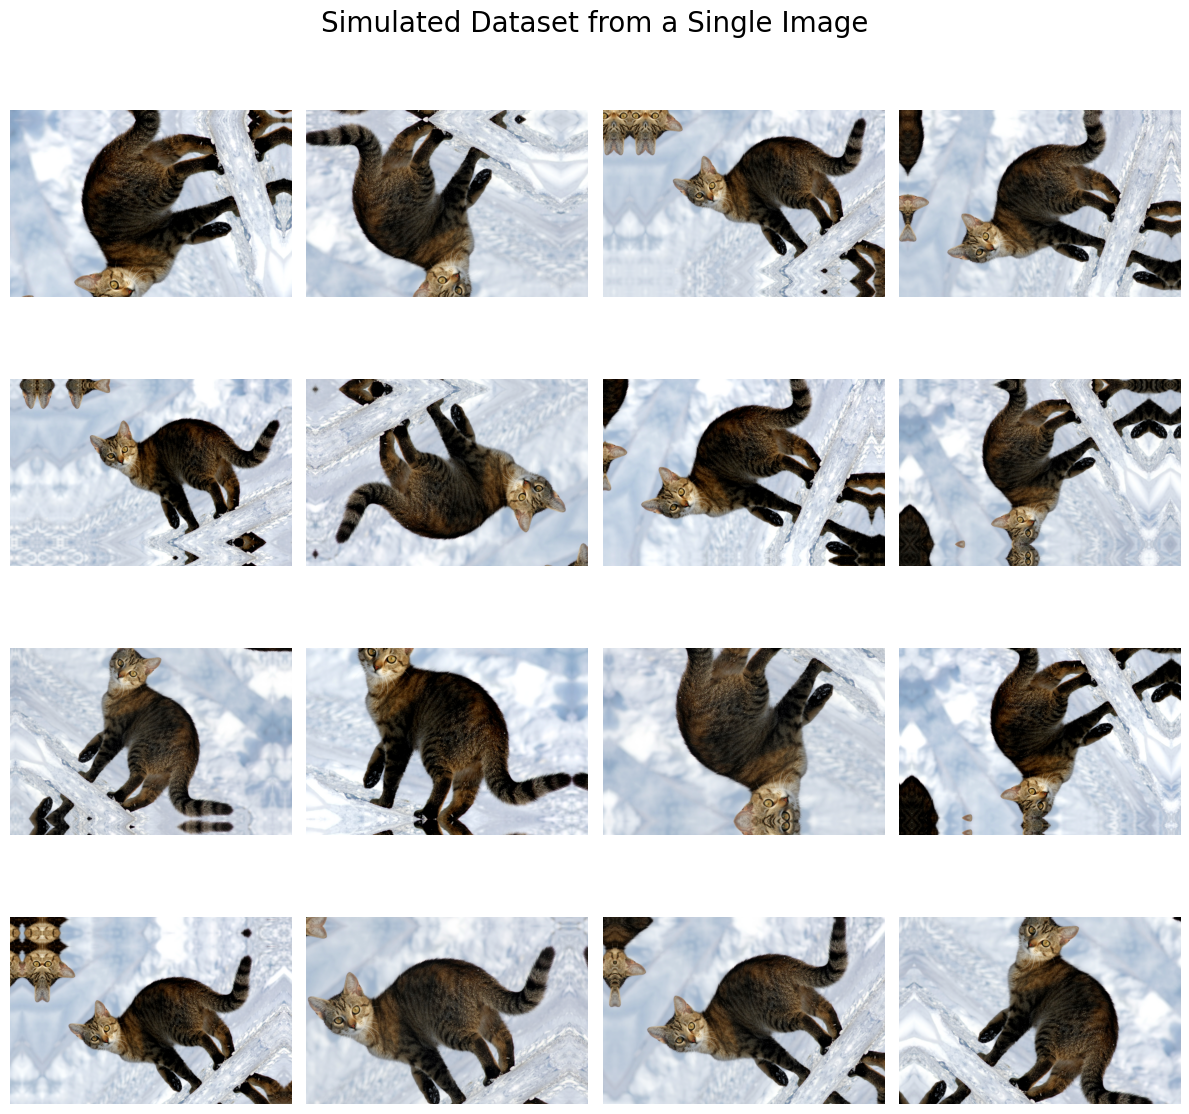

In [10]:
plt.figure(figsize=(12, 12))
expanded_img = tf.expand_dims(img_array, 0)

for i in range(16):
    augmented_image = data_augmentation_pipeline(expanded_img)
    # Clip and cast for display
    display_img = tf.clip_by_value(augmented_image[0], 0, 255).numpy().astype("uint8")
    
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(display_img)
    plt.axis("off")

plt.suptitle("Simulated Dataset from a Single Image", fontsize=20)
plt.tight_layout()
plt.show()